# som demo

In [1]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.
/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#/home/admin/github/wordroid.sblo.jp/lib
import os, sys
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from som import som

In [3]:
sys.path

['',
 '/home/admin/miniconda3/envs/da02/lib/python36.zip',
 '/home/admin/miniconda3/envs/da02/lib/python3.6',
 '/home/admin/miniconda3/envs/da02/lib/python3.6/lib-dynload',
 '/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages',
 '/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/IPython/extensions',
 '/home/admin/.ipython',
 '/home/admin/github/wordroid.sblo.jp/lib']

In [4]:
import random

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = datasets.load_iris()
print(dir(iris))
X = iris.data
print(iris.target_names)
X_sc = preprocessing.scale(X)

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['setosa' 'versicolor' 'virginica']


In [6]:
X_sc[:3]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673]])

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### random initialization

In [8]:
sobj = som.SimpleSOM((20, 30))
sobj

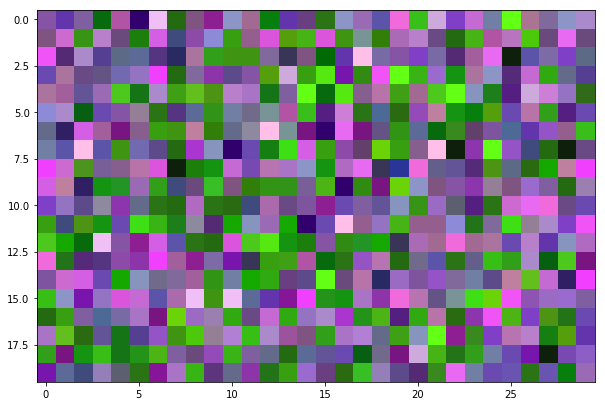

In [9]:
sobj._initialize(X_sc)
sobj.K
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

### linear initialization

In [10]:
sobj = som.SimpleSOM((20, 30), initialization_func='linear')
sobj

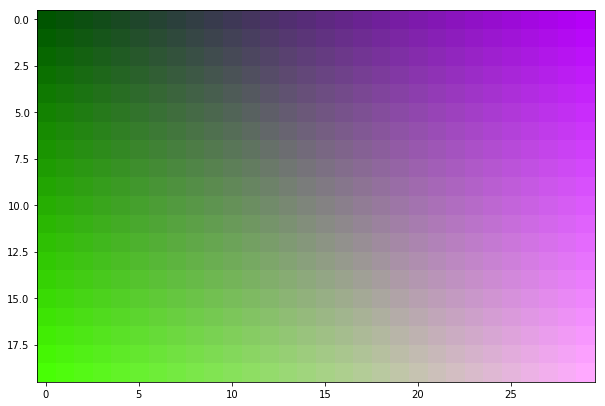

In [11]:
sobj._initialize(X_sc)
sobj.K
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

### train from random init

In [12]:
sobj = som.SimpleSOM((20, 30))
sobj

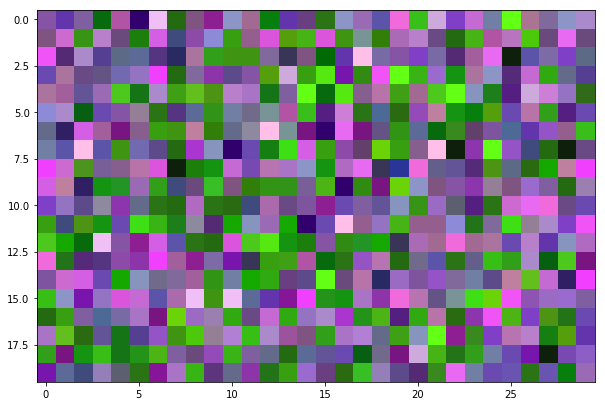

In [13]:
sobj._initialize(X_sc)
sobj.K
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

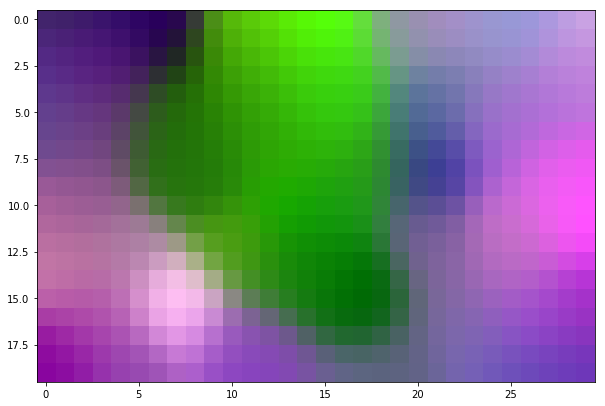

In [14]:
for ii in range(150):
    delta = sobj.calc_delta(X_sc, sobj.K, gamma=0.1)
    sobj.K += delta
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

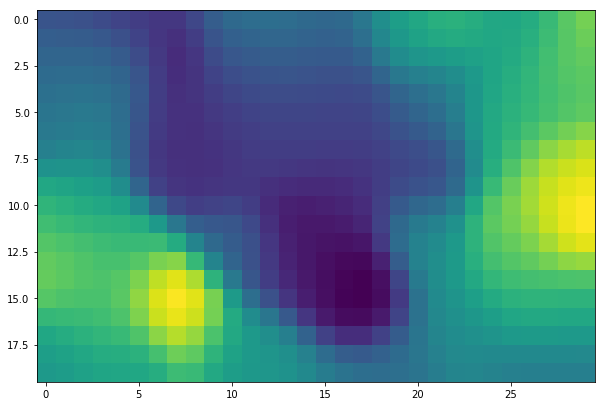

In [15]:
'''show 0th layer'''
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img[:,:,0])

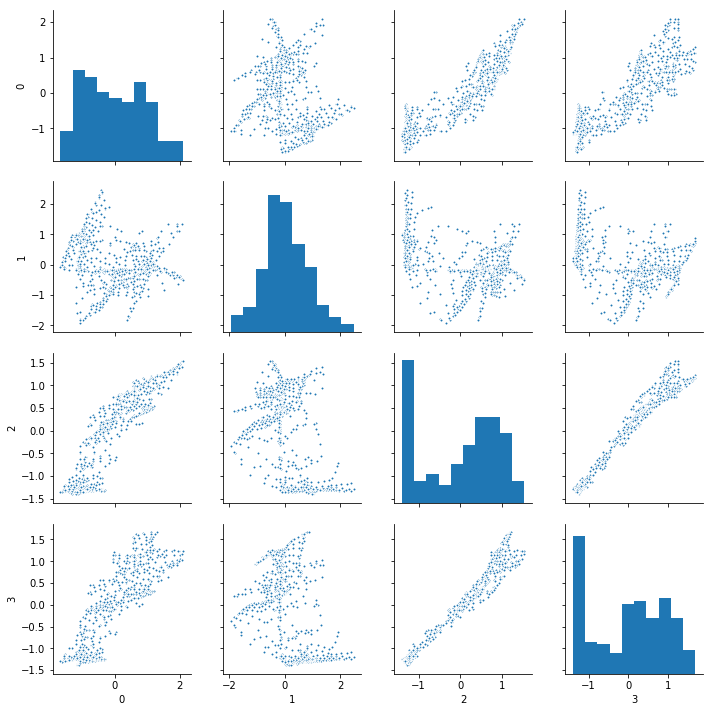

In [16]:
'''plot K(codebooks)'''
df = pd.DataFrame(sobj.K)
sns.pairplot(df, markers='.')

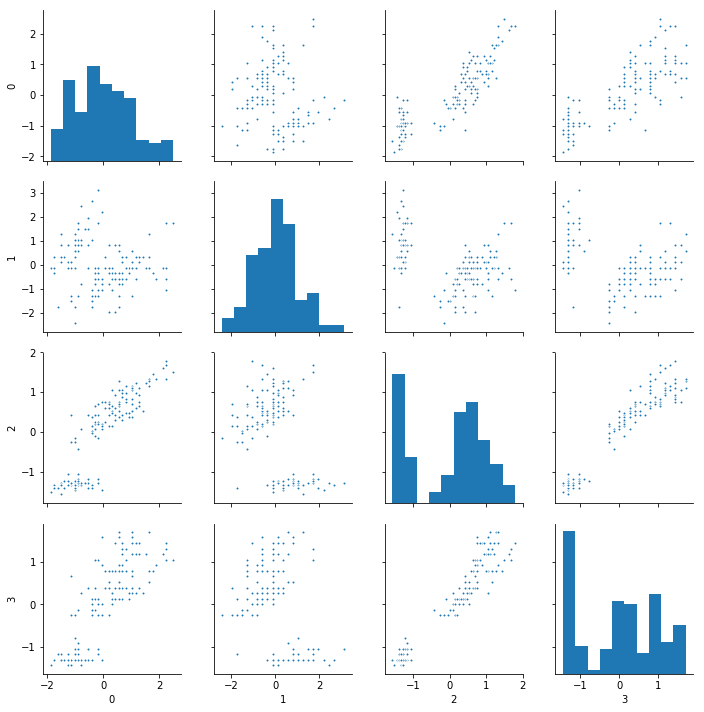

In [17]:
df = pd.DataFrame(X_sc)
sns.pairplot(df, markers='.')

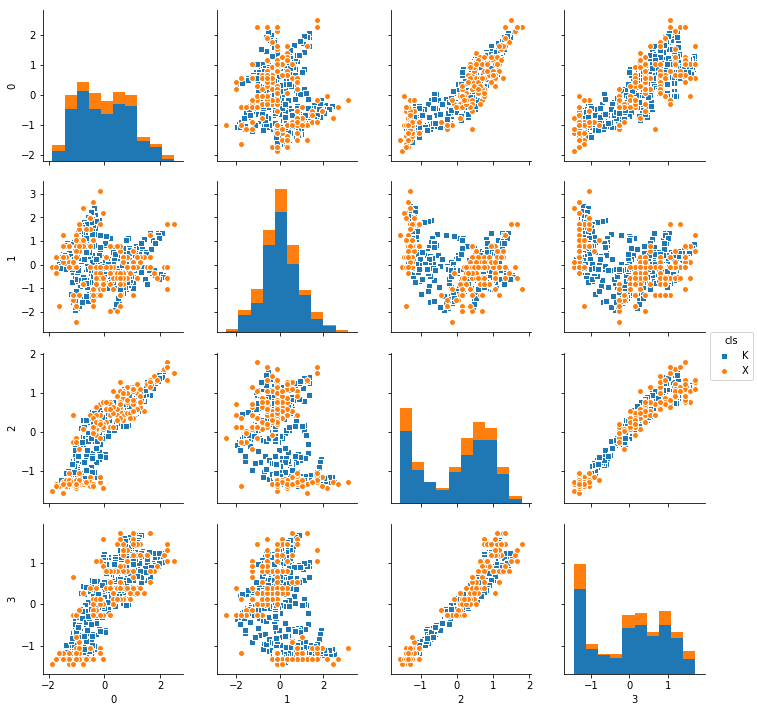

In [18]:
df1= pd.DataFrame(sobj.K)
df1['cls'] = 'K'
df1.head()
df2 = pd.DataFrame(X_sc)
df2['cls'] = 'X'
df2.head()
df = pd.concat([df1, df2], axis=0)
df.head()
df.shape
sns.pairplot(df, markers=['s', 'o'], hue='cls')

### train from linear init

In [19]:
sobj = som.SimpleSOM((20, 30), initialization_func='linear')
sobj

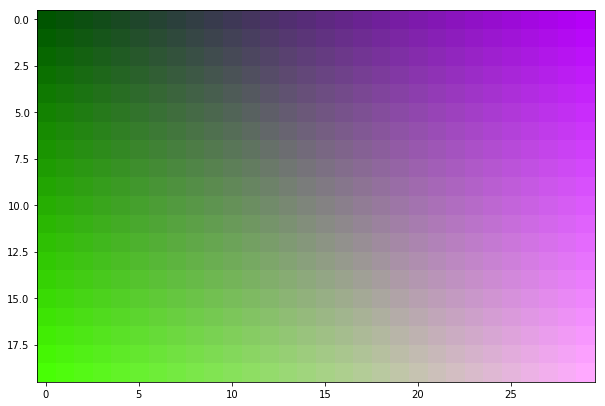

In [20]:
sobj._initialize(X_sc)
sobj.K
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

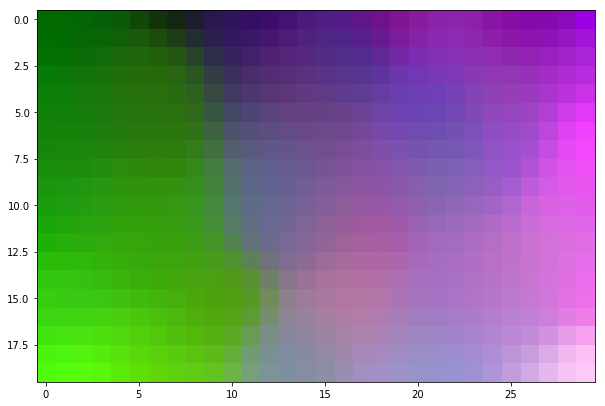

In [21]:
for ii in range(150):
    delta = sobj.calc_delta(X_sc, sobj.K, gamma=0.1)
    sobj.K += delta
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

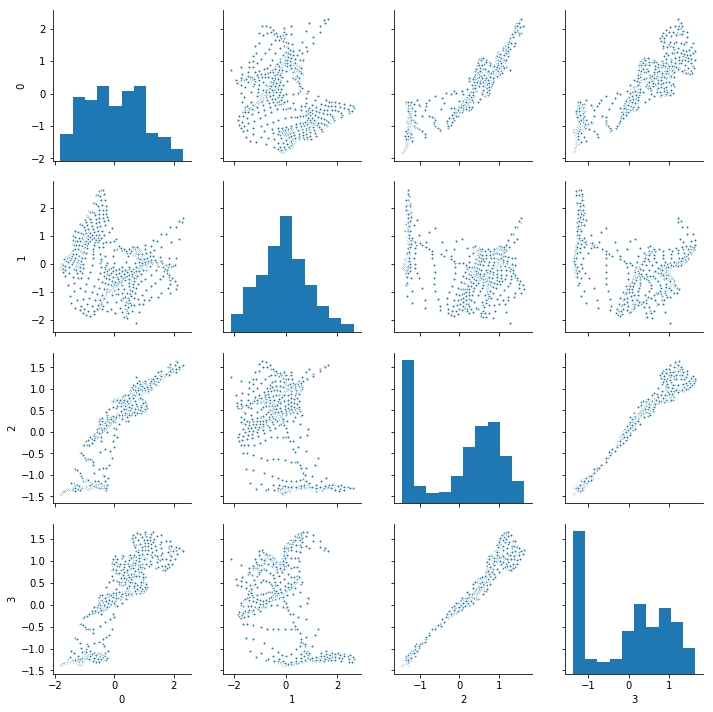

In [22]:
'''plot K(codebooks)'''
df = pd.DataFrame(sobj.K)
sns.pairplot(df, markers='.')

### rand_stat=111

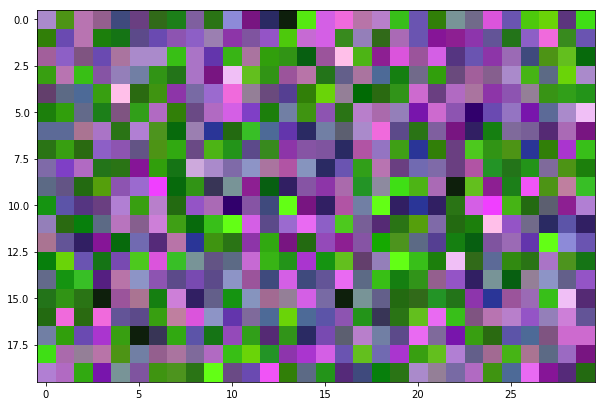

In [23]:
sobj = som.SimpleSOM((20, 30), rand_stat=111)
sobj
sobj._initialize(X_sc)
sobj.K
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

100%|██████████| 150/150 [00:00<00:00, 156.21it/s]


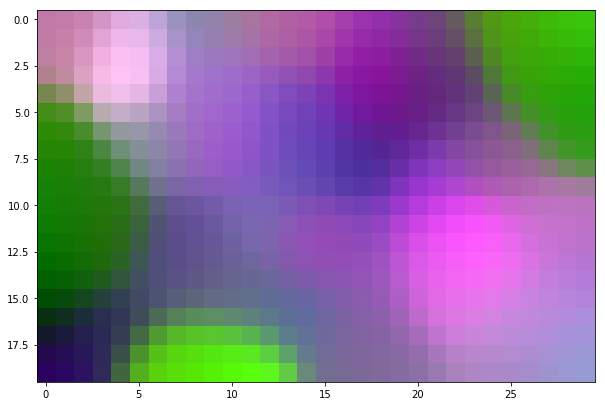

In [24]:
sobj.K = sobj.update_iter(X_sc, sobj.K, r=1.5, it=150)
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

### som training with supervised data

In [25]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_sc, iris.target,
                                                    test_size =0.5,
                                                    random_state=0, shuffle=True,
                                                    stratify=iris.target)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((75, 4), (75, 4), (75,), (75,))

In [27]:
y_train

array([0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 1, 0])

In [28]:
y_test

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 1, 2, 1, 2, 0, 1])

In [29]:
y_cat_train = to_categorical(y_train)
y_cat_train.shape

(75, 3)

In [30]:
X_train = np.c_[x_train, y_cat_train]
X_train.shape

(75, 7)

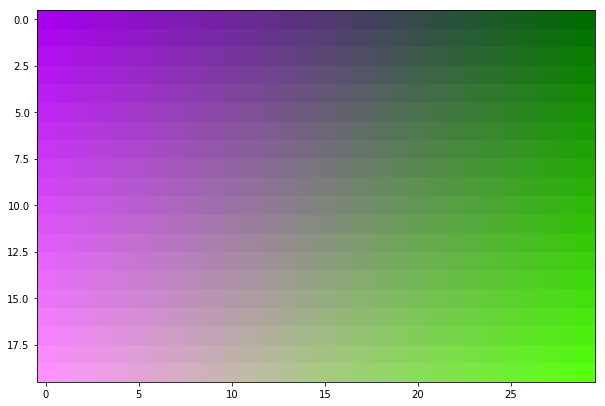

In [31]:
sobj = som.SimpleSOM((20, 30), initialization_func='linear')
sobj
sobj._initialize(X_train)
sobj.K
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

100%|██████████| 150/150 [00:00<00:00, 265.61it/s]


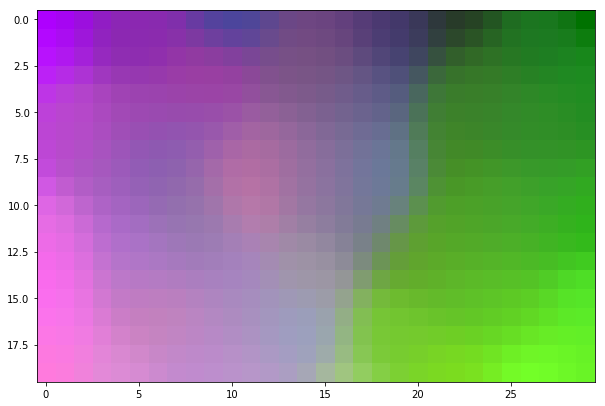

In [32]:
sobj.K = sobj.update_iter(X_train, sobj.K, r=1.5, it=150)
img = som.conv2img(sobj.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

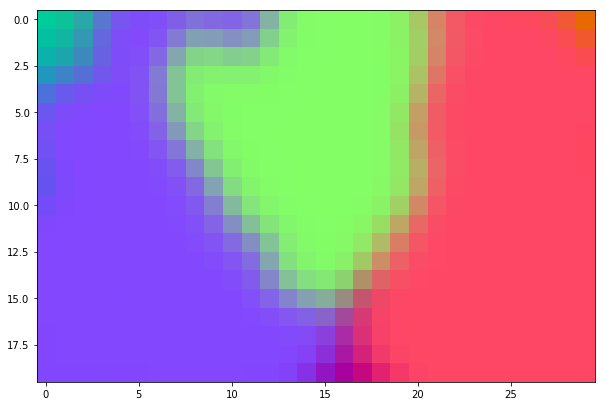

In [33]:
'''show categorical layers'''
img = som.conv2img(sobj.K, (20, 30), target=np.array(range(4,7)))
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [34]:
print(sobj.K.shape)
sobj.K

(600, 7)


array([[ 8.04508184e-01, -2.91889347e+00,  1.85497580e+00, ...,
        -1.05852330e+00,  7.19048840e-01,  3.46904024e-01],
       [ 6.68470159e-01, -2.79371135e+00,  1.67169805e+00, ...,
        -9.52155146e-01,  6.71909820e-01,  3.33066443e-01],
       [ 4.87791779e-01, -2.56620049e+00,  1.37645156e+00, ...,
        -7.18083594e-01,  5.28141100e-01,  4.29309884e-01],
       ...,
       [-2.64365916e-01,  2.92085764e+00, -1.30613145e+00, ...,
         9.99998905e-01, -1.35902139e-05, -4.88807165e-06],
       [-3.36005199e-01,  2.80720648e+00, -1.31992410e+00, ...,
         1.00000175e+00, -2.35952405e-04, -9.84131064e-05],
       [-3.97258951e-01,  2.70734552e+00, -1.33412957e+00, ...,
         1.00033583e+00, -3.66142431e-03, -1.72861709e-03]])

In [35]:
sobj.K[:,4:]

array([[-1.05852330e+00,  7.19048840e-01,  3.46904024e-01],
       [-9.52155146e-01,  6.71909820e-01,  3.33066443e-01],
       [-7.18083594e-01,  5.28141100e-01,  4.29309884e-01],
       ...,
       [ 9.99998905e-01, -1.35902139e-05, -4.88807165e-06],
       [ 1.00000175e+00, -2.35952405e-04, -9.84131064e-05],
       [ 1.00033583e+00, -3.66142431e-03, -1.72861709e-03]])

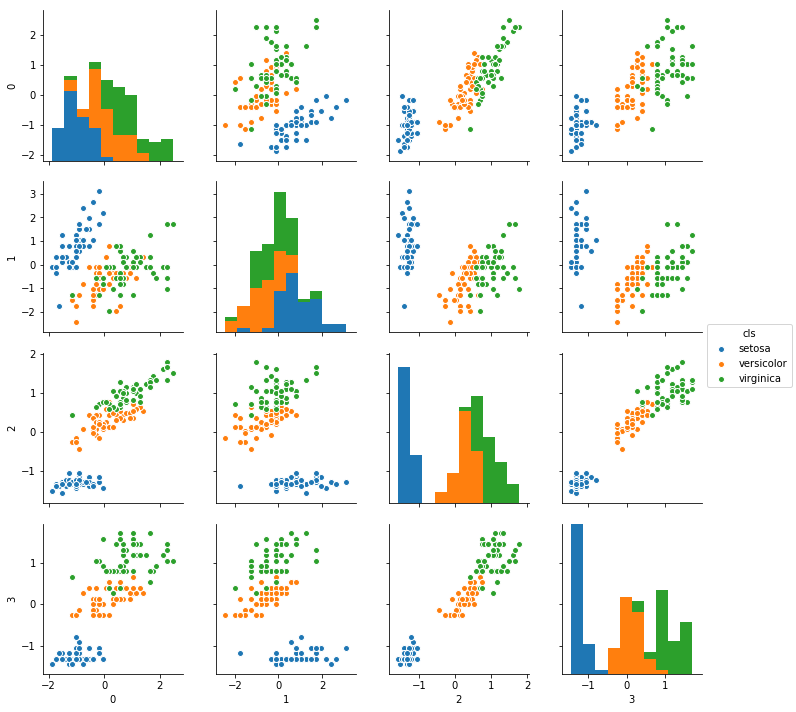

In [36]:
df = pd.DataFrame(X_sc)
df['cls'] = [str(iris.target_names[ee]) for ee in iris.target]
df.head()
sns.pairplot(data=df, markers='o', hue='cls')

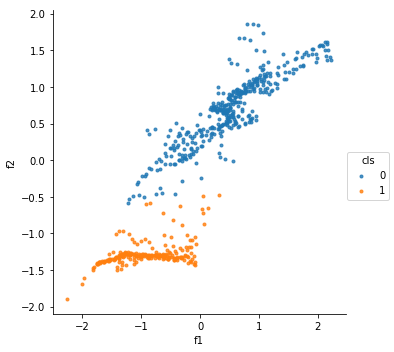

In [37]:
'''show setosa'''
df = pd.DataFrame(sobj.K[:,[0,2]])
df.columns = ['f1', 'f2']
df['cls'] = (0.5<sobj.K[:,4]).astype(int)
df.head()
sns.lmplot(data=df, x='f1', y='f2', markers='.', hue='cls', fit_reg=False)

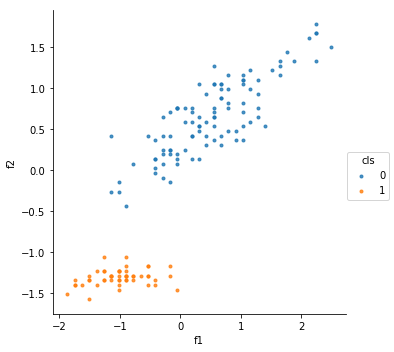

In [38]:
df = pd.DataFrame(X_sc[:,[0,2]])
df.columns = ['f1', 'f2']
df['cls'] = (iris.target==0).astype(int)
df.head()
sns.lmplot(data=df, x='f1', y='f2', markers='.', hue='cls', fit_reg=False)

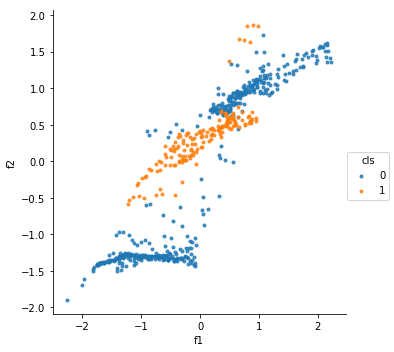

In [39]:
'''show versicolor'''
df = pd.DataFrame(sobj.K[:,[0,2]])
df.columns = ['f1', 'f2']
df['cls'] = (0.5<sobj.K[:,5]).astype(int)
df.head()
sns.lmplot(data=df, x='f1', y='f2', markers='.', hue='cls', fit_reg=False)

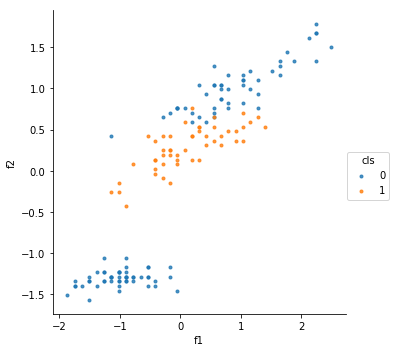

In [40]:
df = pd.DataFrame(X_sc[:,[0,2]])
df.columns = ['f1', 'f2']
df['cls'] = (iris.target==1).astype(int)
df.head()
sns.lmplot(data=df, x='f1', y='f2', markers='.', hue='cls', fit_reg=False)

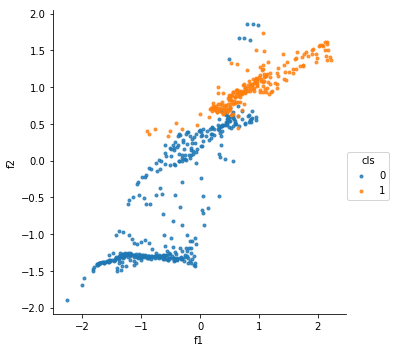

In [41]:
'''show virginica'''
df = pd.DataFrame(sobj.K[:,[0,2]])
df.columns = ['f1', 'f2']
df['cls'] = (0.5<sobj.K[:,6]).astype(int)
df.head()
sns.lmplot(data=df, x='f1', y='f2', markers='.', hue='cls', fit_reg=False)

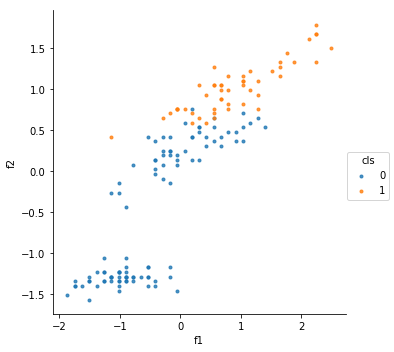

In [42]:
df = pd.DataFrame(X_sc[:,[0,2]])
df.columns = ['f1', 'f2']
df['cls'] = (iris.target==2).astype(int)
df.head()
sns.lmplot(data=df, x='f1', y='f2', markers='.', hue='cls', fit_reg=False)

### predict test data using kmeans

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(n_clusters=600, n_init=1, max_iter=1)

In [45]:
# kmeans.fit(sobj.K[:,:4])

In [46]:
kmeans.labels_ = np.array(range(600))

In [47]:
kmeans.cluster_centers_ = sobj.K[:,:4]
kmeans.cluster_centers_

array([[ 0.80450818, -2.91889347,  1.8549758 ,  1.65803759],
       [ 0.66847016, -2.79371135,  1.67169805,  1.47623989],
       [ 0.48779178, -2.56620049,  1.37645156,  1.16432606],
       ...,
       [-0.26436592,  2.92085764, -1.30613145, -1.12882359],
       [-0.3360052 ,  2.80720648, -1.3199241 , -1.21377626],
       [-0.39725895,  2.70734552, -1.33412957, -1.28138548]])

In [48]:
kmeans.predict(x_train)

array([505,  14, 596, 386, 255, 338, 243, 472,  19, 113, 222, 251,  10,
       359, 435, 352, 361, 383, 136, 128, 258, 569, 578,  98, 196, 491,
       193, 258, 324, 248, 297, 314, 334, 481,  75, 444, 324, 524, 410,
         5, 138, 581,  57,  49, 347, 246, 218, 400, 454, 311, 103, 174,
       254, 119, 592, 151, 574, 420, 486, 479, 518, 262, 251,  22, 207,
       529, 155, 570, 338, 397,  16, 206, 395, 134, 202], dtype=int32)

In [49]:
target_pred = np.argmax(sobj.K[:,4:], axis=1)[kmeans.predict(x_train)]
target_pred

array([0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 1, 0])

In [50]:
print(classification_report(y_train, target_pred))
confusion_matrix(y_train, target_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        25
          1       1.00      1.00      1.00        25
          2       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00        75



array([[25,  0,  0],
       [ 0, 25,  0],
       [ 0,  0, 25]])

In [51]:
'''predict test data'''
target_pred_test = np.argmax(sobj.K[:,4:], axis=1)[kmeans.predict(x_test)]
target_pred_test

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0,
       1, 0, 1, 2, 2, 1, 2, 0, 1])

In [52]:
print(classification_report(y_test, target_pred_test))
confusion_matrix(y_test, target_pred_test)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        25
          1       0.92      0.96      0.94        25
          2       0.96      0.92      0.94        25

avg / total       0.96      0.96      0.96        75



array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]])